In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("ad_spend.csv")

print(df.shape)

df.sample(10)

(200, 3)


,Ad Spend ($),Season,Revenue ($)
92,490,Winter,663
186,674,Monsoon,513
97,307,Monsoon,292
122,288,Summer,246
82,748,Summer,866
142,145,Summer,314
56,269,Monsoon,183
23,523,Summer,541
161,511,Monsoon,344
53,968,Winter,1539


In [ ]:
df.isnull().sum()

,0
Ad Spend ($),0
Season,0
Revenue ($),0


In [ ]:
g = df.groupby("Season")[["Ad Spend ($)", "Revenue ($)"]].mean()
g

,Ad Spend ($),Revenue ($)
Season,,
Monsoon,517.643836,423.150685
Summer,573.836066,689.360656
Winter,552.560606,826.530303


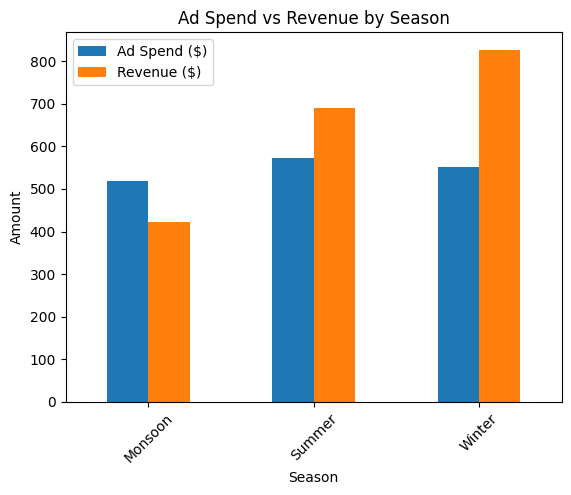

In [ ]:
g.plot(kind="bar")
plt.title("Ad Spend vs Revenue by Season")
plt.xlabel("Season")
plt.ylabel("Amount")

plt.xticks(rotation=45)
plt.show()


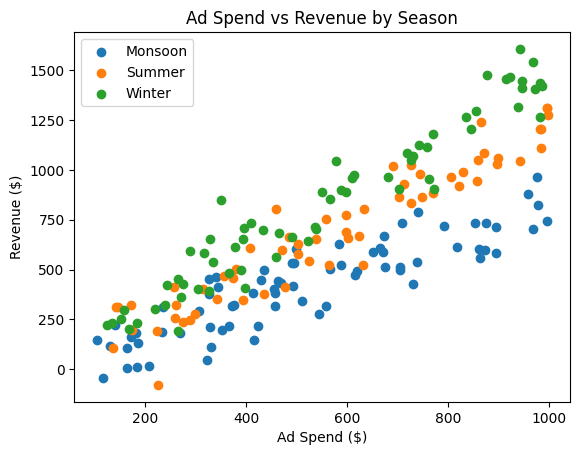

In [ ]:
for season, subdf in df.groupby("Season"):
    plt.scatter(subdf["Ad Spend ($)"].values, subdf["Revenue ($)"].values, label=season)

plt.title("Ad Spend vs Revenue by Season")
plt.xlabel("Ad Spend ($)")
plt.ylabel("Revenue ($)")

plt.legend()
plt.show()

In [ ]:
df_encoded = pd.get_dummies(df, columns=["Season"])
df

,Ad Spend ($),Season,Revenue ($)
0,463,Monsoon,440
1,158,Winter,297
2,328,Monsoon,214
3,322,Monsoon,48
4,726,Winter,1048
...,...,...,...
195,407,Summer,609
196,182,Monsoon,183
197,184,Monsoon,10
198,380,Summer,504


In [ ]:
x = df_encoded.drop("Revenue ($)", axis=1)
y = df_encoded["Revenue ($)"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

### Train Lenear Regression Model

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
# print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))

R2 Score: 0.8882097000477788


### Train Decision Tree Regressor Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred_dt))

R2 Score: 0.896787551823714


### Train GBM

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbm = GradientBoostingRegressor()
model_gbm.fit(X_train, y_train)

y_pred_gbm = model_gbm.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred_gbm))

R2 Score: 0.9229400602731505


In [ ]:
df_eval = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_gbm})
df_eval.head()

,Actual,Predicted
59,605,666.788180
5,1125,1038.214814
20,699,651.721975
198,504,438.740465
52,1310,1147.409145


In [ ]:
df_eval["Diff %"] = abs((df_eval["Predicted"] - df_eval["Actual"])*100/df_eval["Actual"])
df_eval.head()

,Actual,Predicted,Diff %
59,605,666.788180,10.212922
5,1125,1038.214814,7.714239
20,699,651.721975,6.763666
198,504,438.740465,12.948320
52,1310,1147.409145,12.411516
